In [ ]:
!pip install openai
!pip install anthropic

In [3]:
import io
import openai
import os
import base64
from PIL import Image


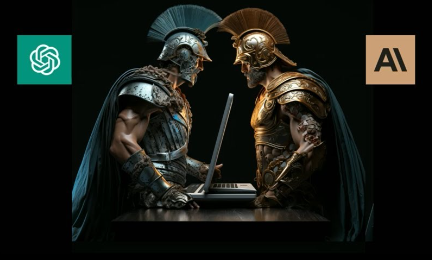

In [16]:
from IPython.display import Image
Image('/content/sample_data/anthroic_vs_openai.png')

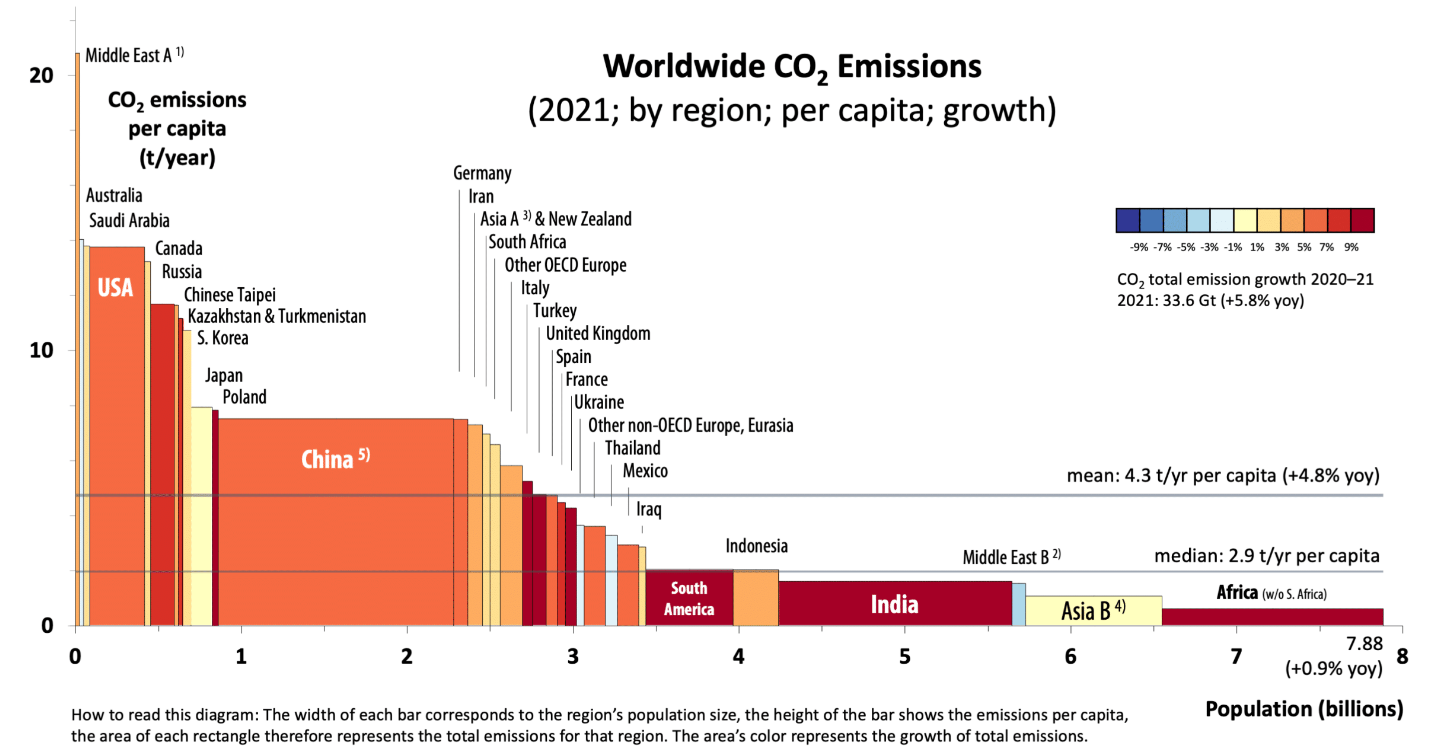

In [10]:
from IPython.display import Image
Image('/content/sample_data/complex_chart.png')

In [11]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
CLAUDE_API_KEY = userdata.get('CLAUDE_API_KEY')
from PIL import Image


Original image source and credits: https://aqalgroup.com/wp-content/uploads/2023/09/2021-Worldwide-CO2-Emissions-by-region-per-capita-growth-v230917.png
**bold text**

In [12]:

# Convert the PNG images to base64 encoded strings
images = [Image.open(f"{'/content/sample_data/complex_chart.png'}")]
base64_encoded_pngs = []
quality=75
max_size=(1024, 1024)
print('set it up!')
for image in images:
# Resize the image if it exceeds the maximum size
    if image.size[0] > max_size[0] or image.size[1] > max_size[1]:
        image.thumbnail(max_size, Image.Resampling.LANCZOS)
        image_data = io.BytesIO()
        image.save(image_data, format='PNG', optimize=True, quality=quality)
        image_data.seek(0)
        base64_encoded = base64.b64encode(image_data.getvalue()).decode('utf-8')
        base64_encoded_pngs.append(base64_encoded)

print('encoding done!')

set it up!
encoding done!


In [13]:
import anthropic
client_claude = anthropic.Anthropic(
api_key=CLAUDE_API_KEY,
)

MODEL_NAME = "claude-3-5-sonnet-20240620"
def get_completion_claude(messages):

  response = client_claude.messages.create(
  model=MODEL_NAME,
  max_tokens=2048,
  temperature=0,
  messages=messages
  )
  return response.content[0].text

def get_message_content(question, encoded_pngs):
  content = [{"type": "image", "source": {"type": "base64", "media_type":"image/png", "data": encoded_png}} for encoded_png in encoded_pngs]
  content1 = {"type": "text", "text": question}
  content.append(content1)
  messages = {"role": 'user',"content": content}
  return messages


In [17]:
question = """
Which country has highest growth of total emissions? Think step by step and explain your answer
"""
messages = get_message_content(question, base64_encoded_pngs)
all_messages = [messages]
chart_analysis = get_completion_claude(all_messages)
print(chart_analysis)

To determine which country has the highest growth of total emissions, I'll follow these steps:

1. Look at the color legend provided in the top right corner of the image.
2. Identify the darkest red color, which represents the highest growth percentage.
3. Scan the chart to find the country/region with that color.

Step 1: The color legend shows a range from dark blue (-9%) to dark red (9%+) for CO2 total emission growth from 2020-2021.

Step 2: The darkest red color represents 9%+ growth.

Step 3: Scanning the chart, I see that China's bar is colored with this darkest red shade.

Therefore, based on the information provided in this chart, China has the highest growth of total CO2 emissions from 2020 to 2021, with a growth rate of 9% or higher.

It's important to note that while China has the highest growth rate, it also has a very large population (as indicated by the width of its bar), which means its total emissions increase would be substantial even with a smaller percentage growth

In [ ]:
client_openai = OpenAI(api_key=OPENAI_API_KEY)
MODEL_NAME_GPT = "gpt-4o"

In [ ]:
def get_completion_gpt4o(messages, model_name):
    response = client_openai.chat.completions.create(
    model=model_name,

    temperature=0,
    messages=messages
    )
    print(response.model)
    return response.choices[0].message.content
def append_message(content, question):
    content.append({"type": "text", "text": question})
    messages = [
        {
            "role": 'user',
"content": content
        }

    ]
    return messages


In [ ]:
content = [{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_png}"}} for encoded_png in base64_encoded_pngs]
question = "Which country has highest growth of total emissions? Think step by step and explain your answer"
print(question)
messages = append_message(content, question)


Which country has highest growth of total emissions? Think step by step and explain your answer


In [ ]:
print(get_completion_gpt4o(messages, MODEL_NAME_GPT))

gpt-4o-2024-05-13
To determine which country has the highest growth of total emissions, we need to follow these steps:

1. **Identify the Color Code for Growth**: The color code for CO₂ emission growth is provided in the legend at the top right of the chart. The colors range from dark blue (representing a -9% growth) to dark red (representing a +9% growth).

2. **Locate the Darkest Red Bar**: The darkest red color represents the highest growth rate of +9%. We need to find the bar that is colored in the darkest red.

3. **Check the Corresponding Country**: Once we locate the darkest red bar, we can identify the country associated with it.

Upon examining the chart, the darkest red bar is associated with **India**. This indicates that India has the highest growth rate of total CO₂ emissions, which is +9% year-over-year (yoy).

Therefore, the country with the highest growth of total emissions is India.


# **Simply Amazing! GPT4-omni It was able to interpret a complex chart  Definitely a notch superior performance than its other peers!**